<a href="https://colab.research.google.com/github/bmontoyag/UTEC_MISTI_2026/blob/main/2025mistiperu_contentchallenge_wordembeddings_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content Challenge: Word Embeddings

Today, we'll learn about word embeddings, visualize them, train a simple embedding model, and see how embeddings help with language tasks. Let's start!


In [4]:
import sys
# Import Packages
!{sys.executable} -m pip install gensim
# Pre-trained Word Embedding Models
import gensim.downloader as api

# Word Embedding Functions
from gensim.models import Word2Vec

# Dimensionality Reduction Methods
from sklearn.decomposition import PCA

# General Packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 61.6 MB/s eta 0:00:00


## EXERCISE: Visualizing Pre-trained Word Embeddings

Here, we’ll use the `gensim` library to load a small set of pre-trained embeddings (e.g., Word2Vec).

Tasks:
1. Review the available pre-trained models from gensim using `print(api.info()['models'].keys())`, and select one of the models (e.g., 'fasttext-wiki-news-subwords-300'). You can look into the differences of each model. *Each model will have a different vocabulary, so keep that in mind.*
2. Load the selected pre-trained model.
3. Select a few words from the vocabulary of the pre-trained model (e.g. `["king", "queen", "man", "woman", "apple", "fruit"]`), extract their vectorized representation and then print them.
4. Using the dimensionality reduction technique **principle component analysis**, reduce the number of dimensions of the vectorized representations so the information is amenable to plotting (i.e., reduce the dimensions to 2 or 3).
5. Plot the dimensionality reduced vector representations.


### TASK 1: Select a pre-trained model

In [5]:
# TASK 1 EXERCISE

# List all pre-trained models available
print(api.info()['models'].keys())

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


### TASK 2: Load the pre-trained model

In [6]:
# TASK 2 EXERCISE

# Load your selected pre-trained embeddings
w2v_model = api.load('glove-wiki-gigaword-50')  # This loads the selected model

[==================================================] 100.0% 66.0/66.0MB downloaded


### TASK 3: Extract the vectorized representations of sample words

In [8]:
# TASK 3 EXERCISE

words = list(w2v_model.index_to_key)

# Select a Few Words and Visualize Relationships
sample_words = ["king", "queen", "man", "woman", "apple", "fruit"]

for word in sample_words:
    if word in w2v_model.key_to_index:
        print(f"Vector for '{word}': {w2v_model[word]}\n")
    else:
        print(f"'{word}' not in vocabulary.")

Vector for 'king': [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]

Vector for 'queen': [ 0.37854    1.8233    -1.2648    -0.1043     0.35829    0.60029
 -0.17538    0.83767   -0.056798  -0.75795    0.22681    0.98587
  0.60587   -0.31419    0.28877    0.56013   -0.77456    0.071421
 -0.5741     0.21342    0.57674    0.3868    -0.12574    0.28012
  0.28135   -1.8053    -1.0421    -0.19255   -0.55375   -0.054526
  1.5574     0.39296   -0.2475     0.34251    0.45365    0.16237
  0.52464   -0.070272  -0.83744   -1.0326     0.45946    0.25302
 -0.

### TASK 4: Dimensionality Reduction

In [10]:
# TASK 4 EXERCISE

# Reduce dimensions to 2D for visualization

# Get vectors for sample words
word_vectors = []
for word in sample_words:
    if word in w2v_model.key_to_index:
        word_vectors.append(w2v_model[word])

# Convert list of vectors to a NumPy array
word_vectors_array = np.array(word_vectors)

# Initialize PCA to reduce dimensions to 2
pca = PCA(n_components=2)

# Fit PCA and transform the word vectors
pca_result = pca.fit_transform(word_vectors_array)

### TASK 5: Visualize the Vector Representations

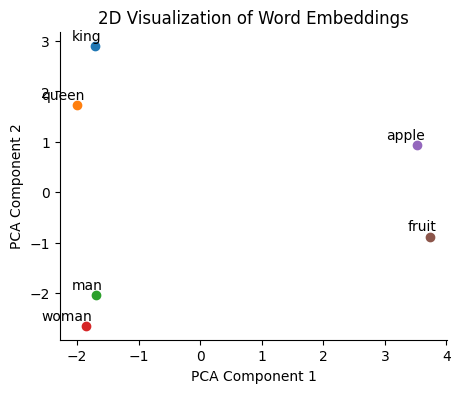

In [11]:
# TASK 5 EXERCISE

# Plot the Dimensionality Reduced Vector Representations
plt.figure(figsize=(5, 4))

for i, word in enumerate(sample_words):
    plt.scatter(pca_result[i, 0], pca_result[i, 1])
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
sns.despine()
plt.show()

## EXERCISE: Train a Simple Word2Vec Model


Tasks:
1. Design your own small text corpus either on your own, from an online source, or using some generative AI tool. This text corpus will be a `list` of sentence `strings`.
2. Tokenize the sentence into individual words.
3. Train a word embedding using `Word2Vec` from `gensim`, or another similar package.
4. Extract the word embeddings for a few example words from your trained model.
5. Visualize the embeddings from your newly trained model.
6. Repeat tasks 1-5 adjusting different parameters to see how it affects the embedding model that is trained. Example parameters or hyperparameters (if you are using the gensim package) that you can adjust include the following: `corpus`, `vector_size`, `window`, `min_count`, etc. Remember, if you increase the vector_size, you will need to do dimensionality reduction to visualize the embedded words.


### TASK 1: Define your corpus

In [12]:
# TASK 1 EXERCISE

corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "I love to eat apples and oranges.",
    "Natural language processing is an interesting field.",
    "Dogs and cats are common pets.",
    "The cat sat on the mat."
]

### TASK 2: Tokenize the Corpus

In [13]:
# TASK 2 EXERCISE

# Tokenize the corpus
tokenized_corpus = [sentence.lower().split() for sentence in corpus]

### TASK 3: Train your own Word Embedding Model

In [14]:
# TASK 3 EXERCISE

# Initialize and train the Word2Vec model
my_w2v_model = Word2Vec(
    sentences = tokenized_corpus,   # Input corpus
    vector_size = 50, # Dimensionality of word embeddings
    window = 5,      # Context window size
    min_count = 1,   # Ignore words with frequency lower than this
    workers = 4,                              # Use 4 CPU threads
    sg = 0           # Skip-gram (1) or CBOW (0)
)

### TASK 4: Extract example word embeddings

In [17]:
# TASK 4 EXERCISE

word_embeddings = {}

# Select a few words from your corpus to extract embeddings
example_words = ["dog.", "apples", "cat"]

for word in example_words:
    if word in my_w2v_model.wv:
        word_embeddings[word] = my_w2v_model.wv[word]
        print(f"Embedding for '{word}': {my_w2v_model.wv[word]}\n")
    else:
        print(f"'{word}' not in the vocabulary of your trained model.")

Embedding for 'dog.': [-3.8884329e-03 -1.0535043e-02  1.8894227e-02 -1.8597465e-02
  9.0078954e-03  1.0808356e-02 -2.8185248e-03  1.8014185e-02
  1.9770719e-02 -1.0950086e-02 -1.2042000e-02 -1.3493946e-02
 -1.5789764e-02 -6.0958336e-03 -1.1188054e-02 -1.6689360e-02
  1.5658045e-03  5.9893131e-03  1.2829487e-02 -5.2578999e-03
 -8.9069530e-03  2.4991417e-03  7.8292371e-04  1.6233997e-02
  3.6560057e-04  1.4463172e-02 -1.6529031e-02  1.6867073e-02
 -3.7778188e-03  1.7402308e-02 -1.5233674e-02  3.5927724e-03
  2.1129728e-03  9.2010501e-05 -1.0206507e-02 -1.8495396e-02
 -1.4528435e-02 -1.5902348e-02  3.8274550e-03  9.5693348e-04
 -3.6262751e-03  1.4240332e-02 -4.9513839e-03 -2.6946187e-03
 -1.7801128e-02 -1.9850826e-02  1.7898796e-02 -1.1507876e-02
 -1.2745995e-02  1.0398814e-02]

Embedding for 'apples': [ 0.00514136  0.01623038 -0.00277292  0.01615767  0.00743513 -0.01609465
 -0.00786765 -0.00494006  0.0097829  -0.00174434 -0.0056649   0.01566329
  0.01864891 -0.00322844 -0.01031668 -0.009

### TASK 5: Visualize your Embeddings

In [ ]:
# TASK 5 EXERCISE

# Plot the Dimensionality Reduced Vector Representations
plt.figure(figsize=(5, 4))

''' ADD YOUR CODE HERE '''

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Embedding Component 1")
plt.ylabel("Embedding Component 2")
sns.despine()
plt.show()

## EXERCISE: Determine the Similarity of Sentences

Here, you will explore the concept of capturing the similarity of words and groups of words in vector space.

Tasks:
1. Calculate the most similar words of your pre-trained model `w2v_model` to an example word (e.g., king) from the model's vocabulary using pre-built functions from `gensim` or a package of your choice.
2. Calculate the similarity between two words in the vocabulary of your pre-trained model `w2v_model` (e.g., "king" and "queen" or "apple" and "fruit") using pre-built functions from `gensim` or a package of your choice.
3. Develop a method to calculate the similarity between two sentences (e.g., "king and queen" with "man and woman"). Consider how you can create a summary vector of a sentence. Here you can use the imported function `cosine` from `scipy.spatial.distance` once you have created a summary vector of each sentence.


### TASK 1: Find similar words to a given word

In [18]:
# TASK 1 EXERCISE
word_1 = "king"
word_2 = "woman"

similar_words_1 = w2v_model.most_similar(word_1)
similar_words_2 = w2v_model.most_similar(word_2)

print("Words similar to " + word_1 + ":", similar_words_1)
print("Words similar to " + word_2 + ":", similar_words_2)

Words similar to king: [('prince', 0.8236179351806641), ('queen', 0.7839043140411377), ('ii', 0.7746230363845825), ('emperor', 0.7736247777938843), ('son', 0.766719400882721), ('uncle', 0.7627150416374207), ('kingdom', 0.7542160749435425), ('throne', 0.7539913654327393), ('brother', 0.7492411136627197), ('ruler', 0.7434253692626953)]
Words similar to woman: [('girl', 0.9065280556678772), ('man', 0.8860336542129517), ('mother', 0.8763704299926758), ('her', 0.8613135814666748), ('boy', 0.859611988067627), ('she', 0.8430695533752441), ('herself', 0.8224568367004395), ('child', 0.8108214139938354), ('wife', 0.8037394285202026), ('old', 0.7982394695281982)]


### TASK 2: Find the similarity between two words

In [19]:
# TASK 2 EXERCISE
word_to_compare_1 = "king"
word_to_compare_2 = "queen"

word_pair_similarity = w2v_model.similarity(word_to_compare_1, word_to_compare_2)

print("Similarity between " + word_to_compare_1 + " and " + word_to_compare_2 + ":", word_pair_similarity)

Similarity between king and queen: 0.7839043


### TASK 3: Find the similarity between two sentences

In [21]:
# TASK 3 EXERCISE

def sentence_vector(sentence, model):
    '''Create a function which, given a word embedding model, and a sentence,
       produces a vector representation of the sentence.
    '''
    words = sentence.lower().split() # Tokenize the sentence
    word_vectors = [model[word] for word in words if word in model.key_to_index] # Get vectors for words in vocabulary

    if not word_vectors:
        return np.zeros(model.vector_size) # Return zero vector if no words are in vocabulary

    # Average the word vectors to get a sentence vector
    return np.mean(word_vectors, axis=0)

# Define two example sentences
sentence_1 = "man king queen"
sentence_2 = "woman king prince"

# Calculate cosine similarity between the sentence embeddings
from scipy.spatial.distance import cosine

vector1 = sentence_vector(sentence_1, w2v_model)
vector2 = sentence_vector(sentence_2, w2v_model)

# Ensure vectors are not zero vectors (i.e., contain actual word embeddings)
if np.all(vector1 == 0) or np.all(vector2 == 0):
    similarity = 0.0 # Or handle as an error/special case
else:
    similarity = 1 - cosine(vector1, vector2)

print(f"Similarity between '{sentence_1}' and '{sentence_2}':", similarity)

Similarity between 'man king queen' and 'woman king prince': 0.97129893
